In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Inspect actions (portfolio weights)
Note: Backtest must be completed before insection of its actions can be done.

In [2]:
def make_int(x):
    try:
        if x.is_integer():
            x = int(x)
        return x
    except Exception as e:
        return x

In [3]:
def get_actions(market_name, model_base_name, gamma_trade, gamma_risk, gamma_hold, seed=0):
    return pd.read_csv(f'../experiments/{market_name}/seeded/{model_base_name}/seed_{seed}/trade_{gamma_trade}_risk_{gamma_risk}_hold_{gamma_hold}/actions.csv', index_col=0, parse_dates=True)

In [4]:
# papermill parameters
# specify which backtest to inspect
MARKET_NAME = 'DOW_30' # use either | 'DOW_30' | 'LA_40' | 'NIK_25' |
MODEL_BASE_NAME = 'RL_CNN' # use either | 'RL_CNN' | 'RL_str_fcast' | 'RL_all_inp' |
N = 10 # how many plots to make
SEED = 0 # don't change - backtests were only done for seed=0

In [5]:
# create directory to save action plots if it doesn't exist already
if not os.path.exists(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}'):
    os.makedirs(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}')

In [6]:
# see the possible gamma values to select from (these were all on the frontier for the given seed)
frontier_df = pd.read_csv(f'../experiments/{MARKET_NAME}/seeded/{MODEL_BASE_NAME}/backtests/{MARKET_NAME}_{MODEL_BASE_NAME}_seed_frontiers.csv')
frontier_df = frontier_df[frontier_df['seed']==SEED]
frontier_df = frontier_df.sort_values(by=['excess_risk', 'sharpe'], ascending=True)
frontier_df.head()

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,100,500.0,100.0,0,-1.914923,1.244722,-1.538434,True
1,50,200.0,10.0,0,-1.884254,1.513436,-1.245017,True
2,500,1000.0,100.0,0,-0.526399,1.668100,-0.315568,True
3,500,1000.0,1000.0,0,0.303385,2.324839,0.130497,True
4,10,75.0,100.0,0,0.776977,3.671567,0.211620,True


In [7]:
# gamma_trade_list = [make_int(i) for i in list(frontier_df['gamma_trade'].round(3))]
# gamma_risk_list = [make_int(j) for j in list(frontier_df['gamma_risk'].round(3))]
# gamma_hold_list = [make_int(k) for k in list(frontier_df['gamma_hold'].round(3))]

# GAMMA_TRIOS = list(zip(gamma_trade_list, gamma_risk_list, gamma_hold_list))
# GAMMA_TRIOS

In [8]:
# get N risk brackets
risk_min = frontier_df['excess_risk'].min()
risk_max = frontier_df['excess_risk'].max()
risk_range = risk_max - risk_min
risk_jump = risk_range/N

print(f'min={risk_min} - max={risk_max}')
print(f'jump={risk_jump}')

risk_brackets = [( risk_min+(i*risk_jump) , risk_min+((i+1)*risk_jump) ) for i in range(N)]

min=1.2447222786386312 - max=19.26726688391114
jump=1.802254460527251


In [9]:
# risk_brackets

In [10]:
frontier_df

,gamma_trade,gamma_risk,gamma_hold,seed,excess_return,excess_risk,sharpe,is_pareto
0,100,500.0,100.0,0,-1.914923,1.244722,-1.538434,True
1,50,200.0,10.0,0,-1.884254,1.513436,-1.245017,True
2,500,1000.0,100.0,0,-0.526399,1.668100,-0.315568,True
3,500,1000.0,1000.0,0,0.303385,2.324839,0.130497,True
4,10,75.0,100.0,0,0.776977,3.671567,0.211620,True
5,500,500.0,100.0,0,1.771701,3.846440,0.460608,True
6,1,300.0,1000.0,0,1.987749,4.481478,0.443548,True
7,50,100.0,100.0,0,2.825300,4.582395,0.616555,True
8,50,300.0,1000.0,0,2.864021,4.860852,0.589201,True
9,50,75.0,1.0,0,4.219703,5.730256,0.736390,True


[1/10]	bracket=(1.24, 3.05)
[2/10]	bracket=(3.05, 4.85)
[3/10]	bracket=(4.85, 6.65)
[4/10]	bracket=(6.65, 8.45)
[5/10]	bracket=(8.45, 10.26)
[6/10]	bracket=(10.26, 12.06)
[7/10]	bracket=(12.06, 13.86)
	no result for [8/10] index 0 is out of bounds for axis 0 with size 0
	no result for [9/10] index 0 is out of bounds for axis 0 with size 0
	no result for [10/10] index 0 is out of bounds for axis 0 with size 0


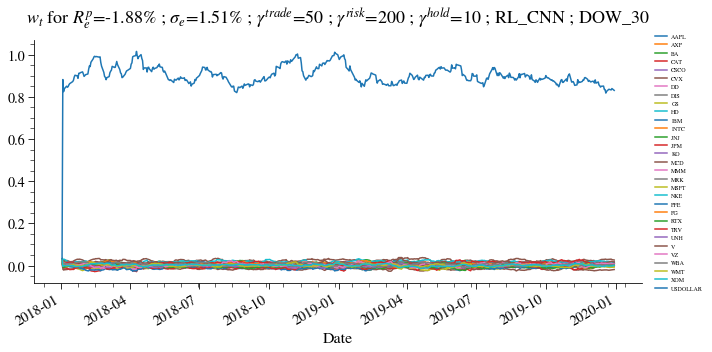

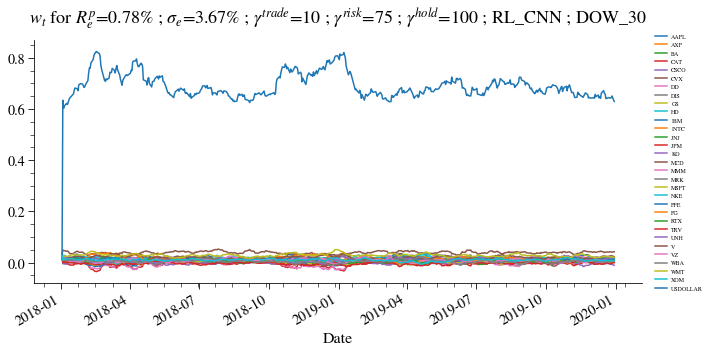

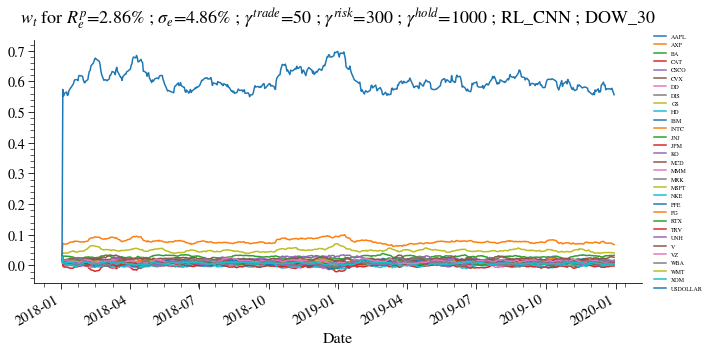

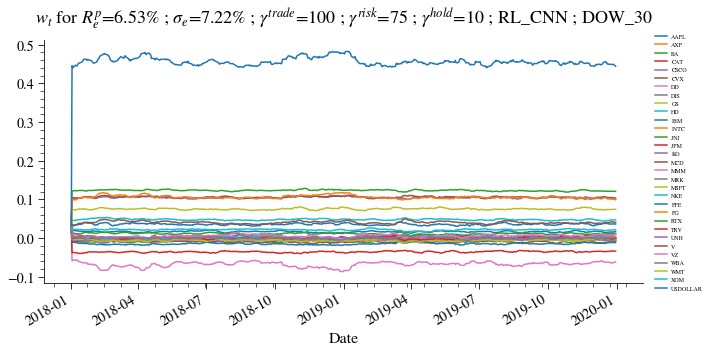

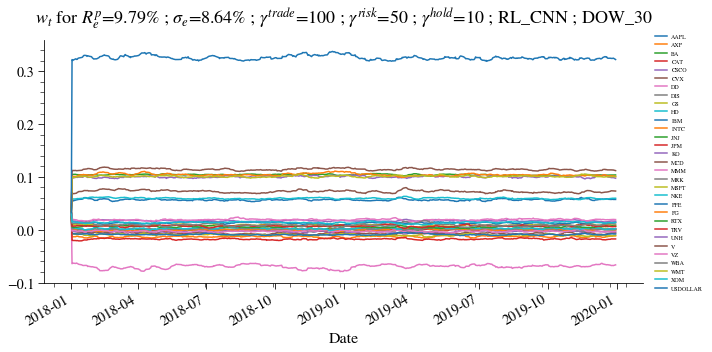

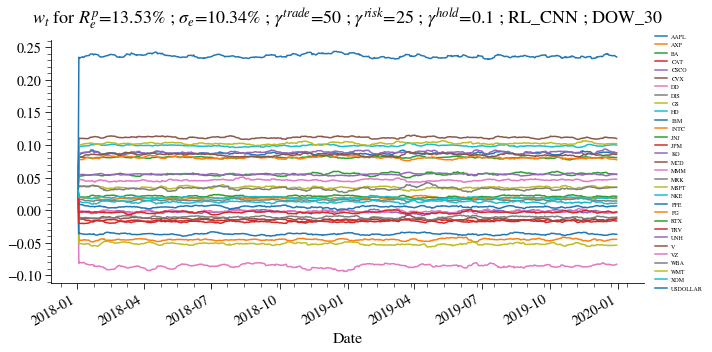

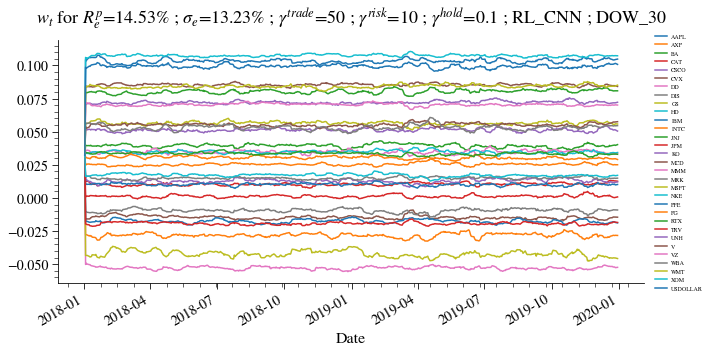

In [11]:
for n in range(N):
    try:
        #idx = (len(frontier_df)//N) * n 
        #GAMMA_TRADE, GAMMA_RISK = GAMMA_PAIRS[idx]
        #print(f'[{m+1}/{N}]\tidx={idx}\tgammas=({GAMMA_TRADE}, {GAMMA_RISK})')
        
        bracket = risk_brackets[n]
        result = frontier_df[(frontier_df['excess_risk']>bracket[0]) & \
                             (frontier_df['excess_risk']<bracket[1])].head(1)
        ret = result['excess_return'].values[0]
        risk = result['excess_risk'].values[0]
        
        GAMMA_TRADE = make_int(result['gamma_trade'].values[0])
        GAMMA_RISK = make_int(result['gamma_risk'].values[0])
        GAMMA_HOLD = make_int(result['gamma_hold'].values[0])

        rl_actions = get_actions(market_name=MARKET_NAME, 
                                 model_base_name=MODEL_BASE_NAME, 
                                 gamma_trade=GAMMA_TRADE, 
                                 gamma_risk=GAMMA_RISK, 
                                 gamma_hold=GAMMA_HOLD, 
                                 seed=SEED)

        print(f'[{n+1}/{N}]\tbracket=({round(bracket[0],2)}, {round(bracket[1],2)})')

        #result = frontier_df[(frontier_df['gamma_trade']==GAMMA_TRADE) & \
        #                  (frontier_df['gamma_risk']==GAMMA_RISK) & \
        #                  (frontier_df['seed']==SEED)]
        

        plot_title = '$w_t$ for $R^p_e$='+f'{round(ret,2)}% ; '+ \
                    '$\sigma_e$='+f'{round(risk,2)}% ; '+\
                    '$\gamma^{trade}$='+f'{GAMMA_TRADE} ; '+\
                    '$\gamma^{risk}$='+f'{GAMMA_RISK} ; '+\
                    '$\gamma^{hold}$='+f'{GAMMA_HOLD} ; '+\
                    f'{MODEL_BASE_NAME} ; {MARKET_NAME}'

        rl_actions.plot(legend=False, figsize=(10,5), title=plot_title)
        plt.legend(bbox_to_anchor=(1.11, 1.05), prop={'size': 6})
        plt.savefig(f'../experiments/actions_check/{MARKET_NAME}/{MODEL_BASE_NAME}/{n}.png') #_risk_{GAMMA_RISK}_trade_{GAMMA_TRADE}.png')
        
    except Exception as e:
        print(f'\tno result for [{n+1}/{N}]', e)

In [12]:
rl_actions

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GS,HD,...,PG,RTX,TRV,UNH,V,VZ,WBA,WMT,XOM,USDOLLAR
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,...,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258
2018-01-03,0.104423,-0.027546,0.079221,0.012047,0.013542,-0.015341,-0.050189,-0.010365,-0.043478,0.106060,...,0.030536,0.034541,0.000759,0.071016,0.053894,0.071744,0.056094,0.084419,0.016291,0.098630
2018-01-04,0.103555,-0.027719,0.079609,0.012955,0.013991,-0.016002,-0.049291,-0.010511,-0.043425,0.105244,...,0.030661,0.034072,0.001166,0.071011,0.052761,0.072023,0.056426,0.083613,0.016461,0.097953
2018-01-05,0.104569,-0.027912,0.079452,0.012783,0.013426,-0.015829,-0.049854,-0.010795,-0.043336,0.105449,...,0.030155,0.034106,0.001414,0.071181,0.052781,0.071685,0.056274,0.084158,0.016462,0.098330
2018-01-08,0.105932,-0.028661,0.080021,0.012103,0.012219,-0.015860,-0.050315,-0.011057,-0.044083,0.106202,...,0.029914,0.033900,0.001301,0.071244,0.053576,0.071485,0.056559,0.084621,0.016407,0.099476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.104462,-0.028476,0.081071,0.012997,0.011692,-0.014869,-0.051701,-0.009244,-0.045421,0.107465,...,0.029443,0.033050,0.000625,0.071697,0.056915,0.070269,0.054601,0.084395,0.017023,0.100897
2019-12-24,0.104132,-0.028176,0.080784,0.013114,0.011753,-0.014375,-0.052136,-0.008944,-0.045214,0.107306,...,0.029497,0.033115,0.000415,0.071798,0.057330,0.070074,0.054296,0.084385,0.017065,0.100946
2019-12-26,0.104260,-0.028338,0.080846,0.012842,0.011452,-0.014468,-0.052098,-0.008980,-0.045244,0.107381,...,0.029523,0.033168,0.000244,0.071768,0.057302,0.070128,0.054556,0.084275,0.016964,0.101326


In [13]:
print('done.')

done.
